   support         itemsets
0      0.8          (bread)
1      0.8         (butter)
2      0.6           (milk)
3      0.6  (butter, bread)


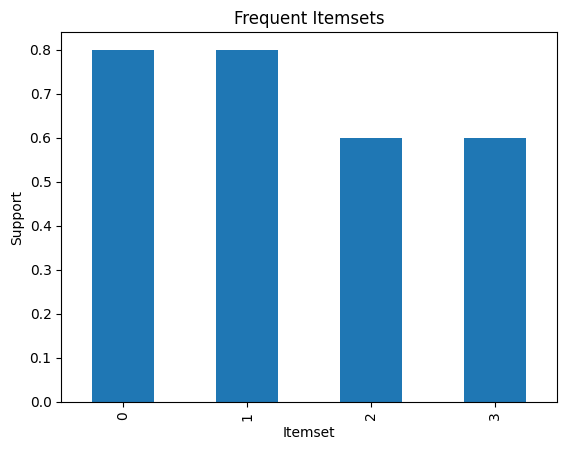

In [4]:
#Mining Frequent Itemsets (Apriori Algorithm)
import pandas as pd
dataset = pd.read_csv('retail_dataset.csv')
dataset = [
    ['milk', 'bread', 'butter'],
    ['bread', 'butter'],
    ['milk', 'bread'],
    ['milk', 'butter'],
    ['bread', 'butter']
]
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply the Apriori algorithm
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
print(frequent_itemsets)
import matplotlib.pyplot as plt

frequent_itemsets['support'].plot(kind='bar')
plt.title('Frequent Itemsets')
plt.xlabel('Itemset')
plt.ylabel('Support')
plt.show()


   support         itemsets
0      0.8          (bread)
1      0.8         (butter)
2      0.6           (milk)
3      0.6  (butter, bread)
4      0.4    (milk, bread)
5      0.4   (butter, milk)
  antecedents consequents  antecedent support  consequent support  support  \
0    (butter)     (bread)                 0.8                 0.8      0.6   
1     (bread)    (butter)                 0.8                 0.8      0.6   
2      (milk)     (bread)                 0.6                 0.8      0.4   
3     (bread)      (milk)                 0.8                 0.6      0.4   
4    (butter)      (milk)                 0.8                 0.6      0.4   
5      (milk)    (butter)                 0.6                 0.8      0.4   

   confidence      lift  representativity  leverage  conviction  \
0    0.750000  0.937500               1.0     -0.04         0.8   
1    0.750000  0.937500               1.0     -0.04         0.8   
2    0.666667  0.833333               1.0     -0.08     

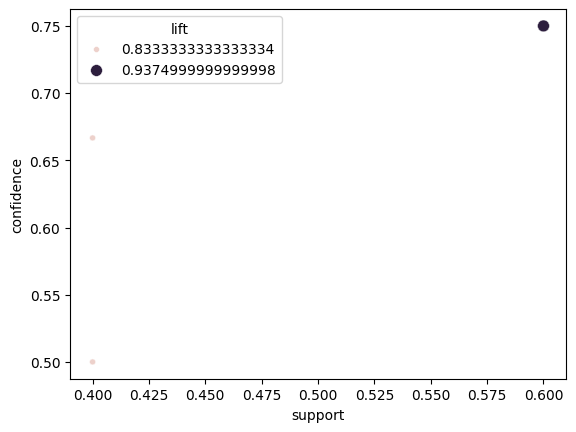

In [11]:
import seaborn as sns
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
# Frequent items found
frequent_itemsets=apriori(df,min_support=0.3,use_colnames=True)
print(frequent_itemsets)

rules = association_rules(frequent_itemsets, metric='lift', min_threshold=0.5)
print(rules)

# Filter rules where the confidence is above 0.8
strong_rules = rules[rules['confidence'] > 0.3]
print(strong_rules)
sns.scatterplot(data=strong_rules, x='support', y='confidence', size='lift', hue='lift')
plt.show()
#print(df.head())


customerID       object
gender           object
SeniorCitizen     int64
Partner          object
Dependents       object
dtype: object
Pearson correlation matrix:
                SeniorCitizen  Partner
SeniorCitizen            NaN      NaN
Partner                  NaN      NaN
Spearman correlation matrix:
                SeniorCitizen  Partner
SeniorCitizen            NaN      NaN
Partner                  NaN      NaN


C:\Users\manna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\manna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


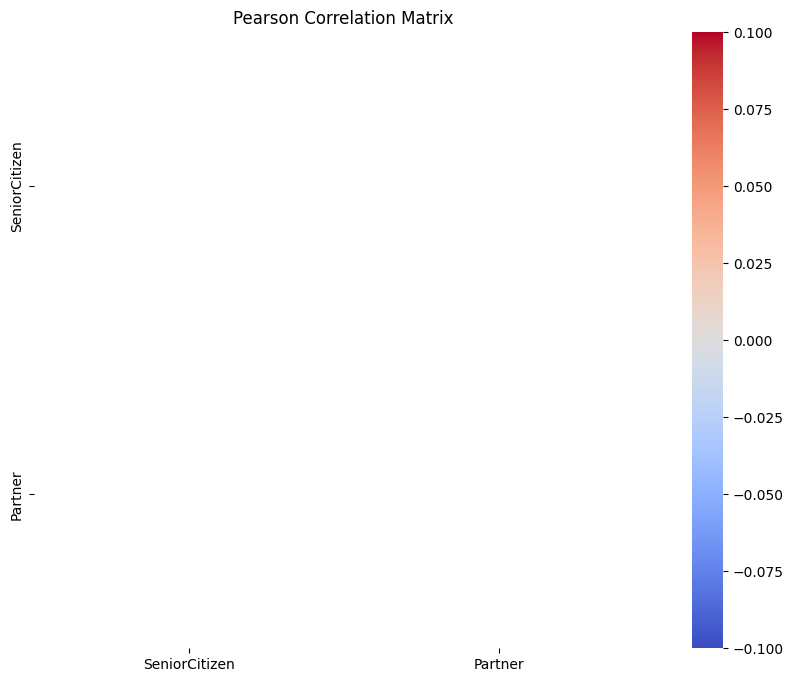

In [ ]:
#correlation analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read data
data = pd.read_csv('customer_data.csv')

# Check the data types of the columns
print(data.dtypes)

# Convert columns that should be numeric (example 'Partner' column)
# Use pd.to_numeric() to convert columns to numeric, with coercion for invalid values
data['Partner'] = pd.to_numeric(data['Partner'], errors='coerce')

# Drop any non-numeric columns or handle them as needed
# Here we select only numeric columns for correlation analysis
data_numeric = data.select_dtypes(include=[np.number])

# Drop rows with NaN values (which might appear after coercion) from the numeric data
data_numeric_cleaned = data_numeric.dropna()

# Pearson correlation matrix
correlation_matrix = data_numeric_cleaned.corr(method='pearson')
print("Pearson correlation matrix:\n", correlation_matrix)

# Spearman correlation matrix
spearman_corr = data_numeric_cleaned.corr(method='spearman')
print("Spearman correlation matrix:\n", spearman_corr)

# Plotting the Pearson correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Pearson Correlation Matrix')
plt.show()
